<a href="https://colab.research.google.com/github/gcochlar/Bootcamp_DataScience/blob/main/Bootcamp_Mod1_Aula01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://drive.google.com/uc?id=16O9eMrtSeRDnDpZgmneXj34eIClCntvg">

# **Analisando Dados da Saúde com Python e Pandas**

Esse notebook vai servir de acompanhamento para toda a aula 01 (6 atividades), bem como rascunho para testar melhorias que deverão ir para o caderno específico de desafios.

A aula trata da aquisição e leitura de dados reais, obtidos diretamente da internet, sem prévio tratamento.

# Notebook da Aula 01 - Vídeo 01



Como de praxe, o primeiro bloco vai servir para importar as bibliotecas que serão necessárias ao longo do caderno e estabelecer algumas regras de formatação que também iremos usar.

In [1]:
#Biblioteca de Análise de Dados
import pandas as pd
#Bibliotecas de Criação de Visualizações Gráficas
import matplotlib.pyplot as plt
import seaborn as sns
#Bibliotecas de Apresentação de Informações no Google Colab
from google.colab import widgets, output

pd.options.display.float_format = "{:.2f}".format

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

O segundo bloco cria as variáveis que contém as diversas URLs onde poderemos acessar os arquivos que servirão de base de dados para nossas investigações.

Os arquivos foram obtidos através de acesso ao DataSUS usando a funcionalidade do TabNet, no portal mantido pelo Governo Federal ([DataSUS](http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi)).

Os dados podem ser consultados de diversas formas, selecionando as informações que queremos e o que constará na estrutura de linhas e colunas a ser gerada.

Para o nosso estudo inicial, selecionamos as informações de:

**Assistência à Saúde** >>> **Produção Hospitalar** >>> **Dados Consolidados por Local de Internação a Partir de 2008**

Na **Abrangência Geográfica**, fizemos uma importação inicial usando a opção **Brasil por Região ou Unidade da Federação** e outra selecionando **Brasil por Municípios**.

Na tela seguinte, optamos por colocar nas **Linhas** as **Unidades da Federação**, no **Conteúdo**, o **Valor Total**, nos **Períodos** marcamos todos os meses disponíveis (de **JAN/2008 até MAR/2021**) e nas **Colunas** também realizamos duas importações, uma considerando **Ano/mês processamento** e outra considerando **Ano/mês atendimento**.

Todas as bases de dados foram geradas na mesma data (18/MAI/2021) para garantir uma certa consistência das informações, pois não sabemos a periodicidade de atualização dos mesmos. Depois de obtidos, os arquivos foram carregados para o repositório no ***GitHub*** de onde estão sendo *linkados* abaixo.

In [2]:
url_processamento_UF='https://github.com/gcochlar/Bootcamp_DataScience/raw/main/dados/BaseDadosDataSUS-Estado-Processamento.csv'
url_processamento_municipios ='https://github.com/gcochlar/Bootcamp_DataScience/blob/main/dados/BaseDadosDataSUS-Municipio-Processamento.csv?raw=true'
url_atendimento_UF='https://github.com/gcochlar/Bootcamp_DataScience/raw/main/dados/BaseDadosDataSUS-Estado-Atendimento.csv'
url_atendimento_municipios='https://github.com/gcochlar/Bootcamp_DataScience/blob/main/dados/BaseDadosDataSUS-Municipio-Atendimento.csv?raw=true'

Podemos então tentar importar o primeiro arquivo a ser analisado, que contém os dados organizados por data de processamento, separados por Estados ou UFs (Unidades da Federação).

In [3]:
#base_de_dados=pd.read_csv(url_processamento_UF)

## Deixei esse bloco comentado para poder executar o código do notebook desde o início sempre que necessário, sem que ele interrompa nesse ponto

Apesar de termos como importar diretamente arquivos CSV pelo Python/Pandas, as tentativas iniciais resultaram em erros, que nos levaram a abrir o arquivo usando um editor de textos simples para entender melhor a sua estrutura.

Para fazer uma primeira limpeza nos dados, precisamos passar alguns parâmetro para o comando ```read_csv```. São eles:


*   ```encoding="ISO-8859-1"```, para que acerte a tabela de códigos de caracteres para o *Latin1* e aceite a acentuação
*   ```sep=";"```, para informar que o separador de campos é o ponto e vírgula e não o padrão (vírgula)
*   ```skiprows=3```, para pular as linhas iniciais, sem dados
*   ```skipfooter=12```, para desprezar as linhas finais, de rodapé



In [4]:
base_de_dados=pd.read_csv(url_processamento_UF, encoding='ISO-8859-1', skiprows=3, sep=';',skipfooter=12)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


Importado com sucesso, podemos visualizar algumas informações de estrutura da base de dados gerada, bem como dos dados que teremos para trabalhar.

In [5]:
guias = widgets.TabBar(['Estrutura', 'Registros Iniciais','Registros Finais'], location='top')

with guias.output_to('Estrutura'):
    print(color.BOLD+color.UNDERLINE+color.DARKCYAN+'\nEstrutura da Base de Dados:\n'+color.END)
    print(base_de_dados.info())
    print('\n')
    print(base_de_dados.shape)
with guias.output_to('Registros Iniciais'):
    display(base_de_dados.head())
with guias.output_to('Registros Finais'):
    display(base_de_dados.tail())


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Estrutura da Base de Dados:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 161 entries, Unidade da Federação to Total
dtypes: object(161)
memory usage: 34.1+ KB
None


(27, 161)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,"1388528,39","2931283,42","1541682,52","1525314,96","1645953,84","1406150,68","3065279,01","3231494,61","3117178,63","3068430,44","2825838,52","2931173,58","2885269,07","2860103,74","3684944,68","3607289,68","3774356,60","3706711,84","3763187,55","3533625,83","3605007,43","3907032,72","3939820,71","3901084,11","3684407,02","3623015,58","3890461,90","4193533,87","4534400,67","4451208,03","4874592,78","4460802,38","5067886,24","4511092,85","4394680,50","4098741,80","4411499,48","3868617,95","4298702,78",...,"7998345,94","8893683,69","8867793,32","8871408,50","8501601,67","8315107,81","8525499,78","9177611,46","7368996,38","8835095,43","8328186,64","8408512,77","9351705,82","8143007,97","8949741,77","9630553,15","9581970,31","7891114,05","9792370,67","9170787,53","8816846,71","10024554,15","9675423,70","8085025,66","9222010,60","7493901,30","8148169,46","7353768,37","7739864,47","9246097,96","11824687,13","11733307,76","10201985,14","7955139,45","9357946,29","8880836,55","9266014,59","7730597,04","11023309,47","996411254,68"
1,12 Acre,"902416,00","1497206,26","1794028,48","1730469,42","1819443,92","1828496,00","2511754,59","2089107,14","2275708,53","1923886,57","1756986,80","2235639,98","2497116,43","2253558,01","2122673,92","2834317,62","2722065,97","2432831,95","2630190,65","2307579,00",-,"2826477,02","2170791,18","2541526,44","2491042,33","1954473,90","2389996,38","2654878,60","2844085,21","2336207,19","2125143,06","2430293,67","2377738,44","2184746,84","2468452,90","2516284,54","3051370,08","2629104,42","2485451,79",...,"3576595,19","2444567,37","2602434,35","3064163,42","2276236,69","3239474,10","3126429,88","2998865,51","2619709,86","3018048,94","3342614,24","2123426,26","2664654,52","1906429,95","3096439,63","2411628,00","2840630,58","3260153,59","3250722,84","3204998,88","3052745,65","3124802,29","3021521,75","2874871,28","3331803,55","3417691,07","3076003,20","2286642,60","2896340,24","3045245,80","3915193,20","3640142,82","3391242,21","4044321,44","3276590,10","3696997,31","3715723,12","3538427,92","4077045,92","450048530,47"
2,13 Amazonas,"4735529,42","7118990,57","8196635,49","8259378,42","7831399,90","8477273,62","9368858,72","9352532,70","9363099,35","8618318,83","6555549,08","7777645,88","7403068,36","6683346,89","9927781,20","8844511,21","9079035,96","8832894,53","9373395,97","9578326,03","9730634,16","9179252,65","8314648,93","9050439,39","9419460,86","8680178,57","9168055,41","9897901,80","9651362,37","10854599,47","10417122,89","8718347,13","8221592,12","9613977,03","9927574,41","9470661,21","9736750,91","8745259,80","9380112,36",...,"13572263,03","13083081,70","14322305,22","14643340,51","14632208,09","14500521,14","14840533,42","14427620,91","15818964,25","16358462,57","15391163,74","14154362,85","16791397,31","14369987,43","16339024,96","15622910,63","16483166,92","15422243,28","15961988,04","15787896,78","16515441,67","15788848,91","15784686,14","14388606,82","16063450,73","14939977,20","15107056,74","13534657,88","19698748,89","21129394,43","19769460,14","18059931,43","17841015,63","16408315,10","19895617,91","17765167,69","21430289,17","25917134,55","22032176,22","1917247936,05"
3,14 Roraima,"657889,53","777939,31","718688,03","839994,39","862347,96","832440,66","996693,0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
22,43 Rio Grande do Sul,"30931325,46","57363420,01","51547794,07","56673338,49","48397733,07","52413429,62","56636376,98","56113054,70","55356224,30","53637713,13","53699506,08","58730379,58","57629317,06","58779088,02","63366430,89","62200230,97","61683824,68","62495363,90","64614271,83","66457445,34","66425009,36","65782428,73","63714541,87","64488493,88","66304168,50","61527419,52","62490522,38","66814413,40","67900518,35","64799726,75","68518232,07","68731297,03","66174969,16","66891309,48","67456434,73","67096302,52","60754144,32","58884339,85","66205364,40",...,"88817066,36","80572288,45","87419899,25","89396935,52","88148251,61","90754504,49","89093690,14","94010888,97","93664724,68","90025945,36","93081292,31","89050712,34","89664703,23","89259306,50","85585754,75","95152786,47","94163838,23","92237333,46","102298314,76","100260145,30","95917106,56","102331615,05","93971904,79","90775418,13","94908336,74","91437940,91","102876132,83","83000318,02","82381774,95","86092502,24","100579287,65","102609965,59","104401019,54","117458292,46","108853890,98","111760506,80","119992419,94","111797400,70","130155185,16","12764391179,92"
23,50 Mato Grosso do Sul,"5377392,11","7002472,61","8423933,19","8797487,68","9770421,80","10905392,18","10249299,82","9671553,45","10218511,05","9547923,55","9450010,19","8365709,79","10033643,71","10746263,10","10849523,03","10902848,13","11991649,26","12050259,66","12174950,98","11178470,01","11997775,92","11686533,15","10756188,43","10565385,71","12148432,58","11270972,80","11947693,50","11435565,54","12392541,52","12441459,98","12025317,84","12353546,78","12381792,58","12340247,31","12467693,91","12356930,32","11209008,55","9656677,02","13698836,79",...,"16320629,25","18448053,83","16620321,36","16682027,02","17555832,83","17357780,20","17090876,79","16468255,95","17395858,50","16259261,13","16390075,24","15350893,92","17108719,02","17713810,57","16882690,96","18253870,27","17778458,45","18387822,48","19870933,20","18913862,69","19591383,84","18935437,09","17230688,81","17895244,76","18115134,64","19542439,88","19032785,73","17410262,53","17913161,92","17363192,43","18858844,44","19877080,68","19247894,51","19497210,85","22023126,25","19629591,55","21693311,15","24337295,63","25168195,34","2324525096,33"
24,51 Mato Grosso,"4795299,01","8684882,23","7886243,14","8794109,79","9231645,40","10221763,77","9163314,28","9243148,81","9052354,89","9677093,95","7150345,50","10421826,32","9939399,66","9332546,32","11965500,15","11185014,96","12058150,55","11635436,04","11698836,48","11823239,61","10810420,65","12130636,06","11574096,75","10726251,53","12364760,67","11382133,07","11947040,32","12233217,84","12656421,09","11263407,74","12795267,96","12805173,87","12171713,91","11961452,83","11777799,00","11142684,27","11709080,86","11149107,81","12381255,67",...,"17253950,09","14789801,16","17498946,87","16279852,74","16103988,77","15883977,51","17163673,03","15569285,17","15630276,46","15838064,68","14815961,13","13853034,99","14229113,36","15288698,79","16045499,92","15890208,95","16092716,67","16699780,69","16314811,22","16763581,32","15608982,84","15855641,23","15823328,54","15032737,51","15259436,50","15066106,66","14906973,08","12563655,61","13632848,78","13215428,53","16834650,98"

<IPython.core.display.Javascript object>

Podemos verificar que foi feita a importação de 27 linhas, consistente com o que esperávamos (26 estados e o Distrito Federal) e 161 colunas, iniciando com a Unidade da Federação (já com um código numérico no início do texto), as informações mensais dos 13 anos (de 2008 à 2020), os 3 meses de 2021 e uma coluna de Total ao final.

No entanto, os dados foram identificados como *object* (*string*) e não como números. Isso porque a nossa notação usa vírgulas para separar os centavos e pontos para separar os milhares, ao contrário do padrão americano.

Precisamos corrigir isso também na nossa importação, adicionando mais dois parâmetros, ```thousands``` e ```decimal```.

In [6]:
base_de_dados=pd.read_csv(url_processamento_UF, encoding='ISO-8859-1', skiprows=3, sep=';',skipfooter=12, thousands='.', decimal=',')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


Agora podemos visualizar melhor o que temos em nossa base de dados.

In [7]:
guias = widgets.TabBar(['Estrutura', 'Registros Iniciais','Registros Finais','Preliminar'], location='top')

with guias.output_to('Estrutura'):
    print(color.BOLD+color.UNDERLINE+color.DARKCYAN+'\nEstrutura da Base de Dados:\n'+color.END)
    print(base_de_dados.info())
    print('\n')
    print(base_de_dados.shape)
with guias.output_to('Registros Iniciais'):
    print(color.BOLD+color.UNDERLINE+color.DARKCYAN+'\nRegistros Iniciais:\n'+color.END)
    display(base_de_dados.head())
with guias.output_to('Registros Finais'):
    print(color.BOLD+color.UNDERLINE+color.DARKCYAN+'\nRegistros Finais:\n'+color.END)
    display(base_de_dados.tail())
with guias.output_to('Preliminar'):
    print(color.BOLD+color.UNDERLINE+color.DARKCYAN+'\nAnálise Preliminar:\n'+color.END)
    display(base_de_dados.describe().T)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Estrutura da Base de Dados:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 161 entries, Unidade da Federação to Total
dtypes: float64(159), object(2)
memory usage: 34.1+ KB
None


(27, 161)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Registros Iniciais:



,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9222010.60,7493901.30,8148169.46,7353768.37,7739864.47,9246097.96,11824687.13,11733307.76,10201985.14,7955139.45,9357946.29,8880836.55,9266014.59,7730597.04,11023309.47,996411254.68
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,-,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,3640142.82,3391242.21,4044321.44,3276590.10,3696997.31,3715723.12,3538427.92,4077045.92,450048530.47
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15788848.91,15784686.14,14388606.82,16063450.73,14939977.20,15107056.74,13534657.88,19698748.89,21129394.43,19769460.14,18059931.43,17841015.63,16408315.10,19895617.91,17765167.69,21430289.17,25917134.55,22032176.22,1917247936.05
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2914195.21,2881281.13,2740423.51,2695484.62,2613895.43,3020718.84,2860584.22,2740088.01,2689103.41,2985029.23,2771881.20,2938769.3

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Registros Finais:



,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
22,43 Rio Grande do Sul,30931325.46,57363420.01,51547794.07,56673338.49,48397733.07,52413429.62,56636376.98,56113054.70,55356224.30,53637713.13,53699506.08,58730379.58,57629317.06,58779088.02,63366430.89,62200230.97,61683824.68,62495363.90,64614271.83,66457445.34,66425009.36,65782428.73,63714541.87,64488493.88,66304168.50,61527419.52,62490522.38,66814413.40,67900518.35,64799726.75,68518232.07,68731297.03,66174969.16,66891309.48,67456434.73,67096302.52,60754144.32,58884339.85,66205364.40,...,88817066.36,80572288.45,87419899.25,89396935.52,88148251.61,90754504.49,89093690.14,94010888.97,93664724.68,90025945.36,93081292.31,89050712.34,89664703.23,89259306.50,85585754.75,95152786.47,94163838.23,92237333.46,102298314.76,100260145.30,95917106.56,102331615.05,93971904.79,90775418.13,94908336.74,91437940.91,102876132.83,83000318.02,82381774.95,86092502.24,100579287.65,102609965.59,104401019.54,117458292.46,108853890.98,111760506.80,119992419.94,111797400.70,130155185.16,12764391179.92
23,50 Mato Grosso do Sul,5377392.11,7002472.61,8423933.19,8797487.68,9770421.80,10905392.18,10249299.82,9671553.45,10218511.05,9547923.55,9450010.19,8365709.79,10033643.71,10746263.10,10849523.03,10902848.13,11991649.26,12050259.66,12174950.98,11178470.01,11997775.92,11686533.15,10756188.43,10565385.71,12148432.58,11270972.80,11947693.50,11435565.54,12392541.52,12441459.98,12025317.84,12353546.78,12381792.58,12340247.31,12467693.91,12356930.32,11209008.55,9656677.02,13698836.79,...,16320629.25,18448053.83,16620321.36,16682027.02,17555832.83,17357780.20,17090876.79,16468255.95,17395858.50,16259261.13,16390075.24,15350893.92,17108719.02,17713810.57,16882690.96,18253870.27,17778458.45,18387822.48,19870933.20,18913862.69,19591383.84,18935437.09,17230688.81,17895244.76,18115134.64,19542439.88,19032785.73,17410262.53,17913161.92,17363192.43,18858844.44,19877080.68,19247894.51,19497210.85,22023126.25,19629591.55,21693311.15,24337295.63,25168195.34,2324525096.33
24,51 Mato Grosso,4795299.01,8684882.23,7886243.14,8794109.79,9231645.40,10221763.77,9163314.28,9243148.81,9052354.89,9677093.95,7150345.50,10421826.32,9939399.66,9332546.32,11965500.15,11185014.96,12058150.55,11635436.04,11698836.48,11823239.61,10810420.65,12130636.06,11574096.75,10726251.53,12364760.67,11382133.07,11947040.32,12233217.84,12656421.09,11263407.74,12795267.96,12805173.87,12171713.91,11961452.83,11777799.00,11142684.27,11709080.86,11149107.81,12381255.67,...,17253950.09,14789801.16,17498946.87,16279852.74,16103988.77,15883977.51,17163673.03,15569285.17,15630276.46,15838064.68,14815961.13,13853034.99,14229113.36,15288698.79,16045499.92,15890208.95,16092716.67,16699780.69,16314811.22,16763581.32,15608982.84,15855641.23,15823328.54,15032737.51,15259436.50,15066106.66,14906973.08,12563655.61,13632848.78,13215428.53,16834650.98,19704915.36,20746227.60,22727405.20,20506039.58,19583803.46,19120141.68,18349376.92,19611032.61,2180119781.15
25,52 Goiás,15310637.29,22258668.68,21442515.75,20921212.45,21615970.67,18270043.87,20540517.13,20650730.67,20868443.56,20621423.04,17094580.10,21615561.61,20678552.05,23043942.78,23334312.45,23508108.16,23947606.91,24369848.15,24577126.64,24372626.65,25227845.74,24746686.90,24628958.50,25524615.37,23352380.22,23520045.07,25369725.89,24404417.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Análise Preliminar:



,count,mean,std,min,25%,50%,75%,max
2008/Jan,27.00,15126846.64,19159188.30,657889.53,4740724.30,7985142.43,17684828.78,91678473.48
2008/Fev,27.00,22710158.12,30879444.07,777939.31,7060731.59,10079928.25,25693265.33,148677526.82
2008/Mar,27.00,24594187.35,32516725.69,718688.03,8041439.31,10352238.59,29357964.23,156087269.23
2008/Abr,27.00,25431957.83,33339066.25,839994.39,8526744.11,11253833.56,32741327.52,161227125.43
2008/Mai,27.00,26511245.91,37540771.63,862347.96,8531522.65,12215107.11,31376220.41,187119397.64
...,...,...,...,...,...,...,...,...
2020/Dez,27.00,53377763.15,69629260.36,675277.05,17785220.53,23846816.35,70655565.76,330489045.98
2021/Jan,27.00,56073748.02,73766807.81,419553.49,18331663.28,28044464.51,75966083.87,355149525.60
2021/Fev,27.00,55578233.31,72846413.77,319160.87,18438153.15,26317613.74,74950094.36,348827130.99
2021/Mar,27.00,62502301.42,82320629.42,1357751.33,19814679.18,31831917.45,82623811.65,392946147.42


<IPython.core.display.Javascript object>

Apesar de parecer ter importado corretamente, podemos notar na aba Estrutura que o Python continua apontando para 2 colunas do tipo *string*, enquanto deveríamos ter somente uma, a primeira.

A maneira que encontrei para identificar qual mês estava com dados corrompidos foi executando o *loop* abaixo e analisando o resultado.

In [11]:
guias = widgets.TabBar(['Geral', 'Dados Corrompidos'], location='top')

lista_colunas=base_de_dados.columns.to_list()

with guias.output_to('Geral'):
    print(color.BOLD+color.UNDERLINE+color.DARKCYAN+'\nListagem Geral:\n'+color.END)
    for i in lista_de_colunas:
        base_temp=base_de_dados.loc[:,['Unidade da Federação',i]]
        base_temp.info()    
with guias.output_to('Dados Corrompidos'):
    print(color.BOLD+color.UNDERLINE+color.DARKCYAN+'\nDados Corrompidos:\n'+color.END)
    base_de_dados.loc[:,['Unidade da Federação','2009/Set']].info()




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Listagem Geral:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unidade da Federação  27 non-null     object
 1   Unidade da Federação  27 non-null     object
dtypes: object(2)
memory usage: 560.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unidade da Federação  27 non-null     object 
 1   2008/Jan              27 non-null     float64
dtypes: float64(1), object(1)
memory usage: 560.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unidade da Federação  27 non-null     object 
 1   2008/Fev    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Dados Corrompidos:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unidade da Federação  27 non-null     object
 1   2009/Set              27 non-null     object
dtypes: object(2)
memory usage: 560.0+ bytes


<IPython.core.display.Javascript object>

Aproveitando então o desafio proposto no final do vídeo, que era de analisar os dados de um mês específico, resolvi analisar essa coluna para tentar encontrar o problema.

In [12]:
base_de_dados.loc[:,'2009/Set']

0       3605007.43
1                -
2       9730634.16
3       1701611.25
4      27967969.22
5       2034329.78
6       6542918.14
7      19722895.51
8      12247027.29
9      34471579.06
10     13213817.60
11     16117680.24
12     37971068.17
13     11170853.09
14      6341601.06
15     53839068.59
16     96911075.38
17     15382323.46
18     52027721.77
19    220292973.66
20     65843824.73
21     37380382.93
22     66425009.36
23     11997775.92
24     10810420.65
25     25227845.74
26     14487053.32
Name: 2009/Set, dtype: object

De pronto foi possível identificar que o problema estava na linha 1, que continha um hífen no lugar de um valor. Sendo assim, a coluna inteira foi importada como *string*.

Para resolver isso foi necessário substituir o hífen pelo número zero e depois converter a coluna inteira para o tipo ```float```, o que foi feito com os comandos abaixo:

In [13]:
base_de_dados.loc[1,'2009/Set']=0
base_de_dados['2009/Set'] = base_de_dados['2009/Set'].astype(float)
base_de_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 161 entries, Unidade da Federação to Total
dtypes: float64(160), object(1)
memory usage: 34.1+ KB


Agora sim temos a base de dados em condições de ser analisada mais profundamente, o que deve ser feito na próxima aula.

De forma complementar, fiz algumas experiências com uma base temporária, só para melhorar conhecimentos de manipulação de um *dataframe*.

In [14]:
base_temp=pd.DataFrame()
base_temp=base_de_dados
base_temp.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9222010.60,7493901.30,8148169.46,7353768.37,7739864.47,9246097.96,11824687.13,11733307.76,10201985.14,7955139.45,9357946.29,8880836.55,9266014.59,7730597.04,11023309.47,996411254.68
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,0.00,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,3640142.82,3391242.21,4044321.44,3276590.10,3696997.31,3715723.12,3538427.92,4077045.92,450048530.47
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15788848.91,15784686.14,14388606.82,16063450.73,14939977.20,15107056.74,13534657.88,19698748.89,21129394.43,19769460.14,18059931.43,17841015.63,16408315.10,19895617.91,17765167.69,21430289.17,25917134.55,22032176.22,1917247936.05
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2914195.21,2881281.13,2740423.51,2695484.62,2613895.43,3020718.84,2860584.22,2740088.01,2689103.41,2985029.23,2771881.20,293876

Criando colunas totalizadoras para cada ano (fiz um *loop* para os anos completos mas deixei manualmente os 3 meses de 2021 que já estão na base).

In [15]:
for i in range(2008,2021):
    i_inicial=f'{i}/Jan'
    i_final=f'{i}/Dez'
    base_temp[str(i)]=base_temp.loc[:,i_inicial:i_final].sum(axis=1)

base_temp['2021']=base_temp.loc[:,'2021/Jan':'2021/Mar'].sum(axis=1)


E criando uma coluna de variação percentual, comparando o total de gastos de 2020 com 2010.

In [16]:
base_temp['Var 2020/2010']=(base_temp['2020']/base_temp['2010']-1)


In [17]:
print(base_temp.columns.to_list())

['Unidade da Federação', '2008/Jan', '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai', '2008/Jun', '2008/Jul', '2008/Ago', '2008/Set', '2008/Out', '2008/Nov', '2008/Dez', '2009/Jan', '2009/Fev', '2009/Mar', '2009/Abr', '2009/Mai', '2009/Jun', '2009/Jul', '2009/Ago', '2009/Set', '2009/Out', '2009/Nov', '2009/Dez', '2010/Jan', '2010/Fev', '2010/Mar', '2010/Abr', '2010/Mai', '2010/Jun', '2010/Jul', '2010/Ago', '2010/Set', '2010/Out', '2010/Nov', '2010/Dez', '2011/Jan', '2011/Fev', '2011/Mar', '2011/Abr', '2011/Mai', '2011/Jun', '2011/Jul', '2011/Ago', '2011/Set', '2011/Out', '2011/Nov', '2011/Dez', '2012/Jan', '2012/Fev', '2012/Mar', '2012/Abr', '2012/Mai', '2012/Jun', '2012/Jul', '2012/Ago', '2012/Set', '2012/Out', '2012/Nov', '2012/Dez', '2013/Jan', '2013/Fev', '2013/Mar', '2013/Abr', '2013/Mai', '2013/Jun', '2013/Jul', '2013/Ago', '2013/Set', '2013/Out', '2013/Nov', '2013/Dez', '2014/Jan', '2014/Fev', '2014/Mar', '2014/Abr', '2014/Mai', '2014/Jun', '2014/Jul', '2014/Ago', '2014/Set', '20

A partir das informações de variação 2020 x 2010, criei um gráfico de barras para comparar os estados em relação aos seus respectivos crescimentos de gastos.

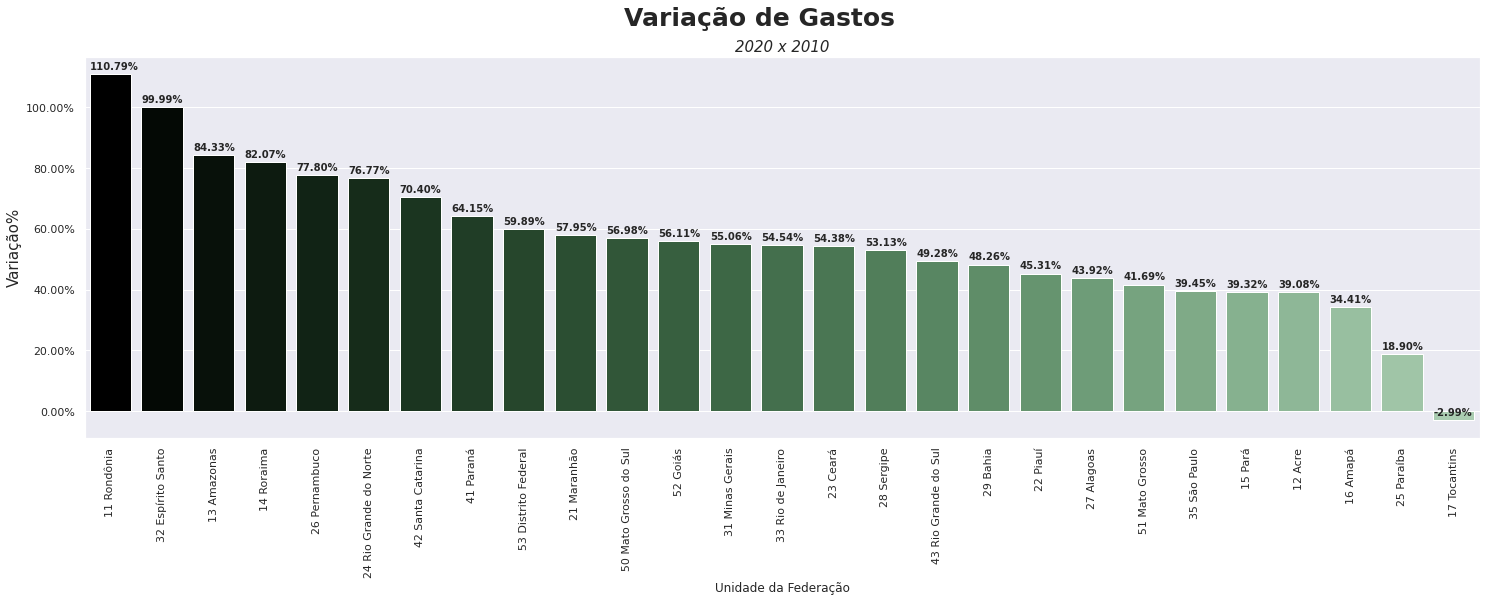

In [18]:
sns.set(style='darkgrid')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,7))
fig.suptitle('Variação de Gastos',fontweight='bold', fontsize=25)
palette = sns.cubehelix_palette(27, start=2, rot=0, dark=0, light=.75, reverse=True)

ordem_lista=base_temp.loc[:,['Unidade da Federação','Var 2020/2010']].sort_values(by=['Var 2020/2010'], ascending=False,ignore_index=True)

ax = sns.barplot(x = ordem_lista['Unidade da Federação'], y=ordem_lista['Var 2020/2010'],ax=ax, orient='v', palette=palette)
ax.set_title('2020 x 2010',style='italic', fontsize=15)
ax.tick_params(axis='x', rotation = 90)
ax.set_ylabel('Variação%',fontsize=15)

for p in ax.patches:
    x_valor=p.get_x()
    y_valor=p.get_y()+p.get_height()+.015
    ax.annotate('{:.2%}'.format(p.get_height()), (x_valor, y_valor),fontweight='bold',fontsize=10)
ax.tick_params(axis='x', rotation = 90)

valores_y = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in valores_y])

plt.show()


Para melhorar um pouco, já vou separar a coluna 'Unidades da Federação' em outras duas colunas, 'Código UF' e 'UF'.

In [35]:
base_temp[['Código UF','UF']]=pd.DataFrame(base_temp['Unidade da Federação'].str.split(' ',1).tolist())
base_temp.head().T

,0,1,2,3,4
Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará
2008/Jan,1388528.39,902416.00,4735529.42,657889.53,18864744.11
2008/Fev,2931283.42,1497206.26,7118990.57,777939.31,19553758.20
2008/Mar,1541682.52,1794028.48,8196635.49,718688.03,21937342.70
2008/Abr,1525314.96,1730469.42,8259378.42,839994.39,20842829.69
...,...,...,...,...,...
2020,109157714.48,40018213.54,210212793.77,36868427.83,446873379.68
2021,28019921.10,11331196.96,69379599.94,10772232.28,109319389.58
Var 2020/2010,1.11,0.39,0.84,0.82,0.39
Código UF,11,12,13,14,15


# Aula 01 - Vídeo 02